In [ ]:
import os
import sys
import torch

if os.path.abspath("../../") not in sys.path:
    sys.path.append(os.path.abspath("../../"))

from building_gan.src.config import Configuration
from building_gan.src.data import GraphDataLoaders
from building_gan.src.models import VoxelGNNGenerator, VoxelGNNDiscriminator
from building_gan.src.trainer import Trainer

configuration = Configuration(sanity_checking=True)
configuration.set_seed()

dataloaders = GraphDataLoaders(configuration=configuration)
generator = VoxelGNNGenerator(configuration)
discriminator = VoxelGNNDiscriminator(configuration)

optimizer_generator = torch.optim.AdamW(generator.parameters(), lr=configuration.LEARNING_RATE_GENERATOR)
optimizer_discriminator = torch.optim.AdamW(discriminator.parameters(), lr=configuration.LEARNING_RATE_DISCRIMINATOR)
scheduler_generator = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_generator, T_max=configuration.EPOCHS)

trainer = Trainer(
    generator=generator,
    discriminator=discriminator,
    dataloaders=dataloaders,
    optimizer_generator=optimizer_generator,
    optimizer_discriminator=optimizer_discriminator,
    scheduler_generator=scheduler_generator,
    configuration=configuration,
    log_dir=os.path.join(configuration.LOG_DIR, "sanity-checking"),
)

trainer.train()

In [ ]:
!tensorboard --logdir=../runs/sanity-checking

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6006/ (Press CTRL+C to quit)


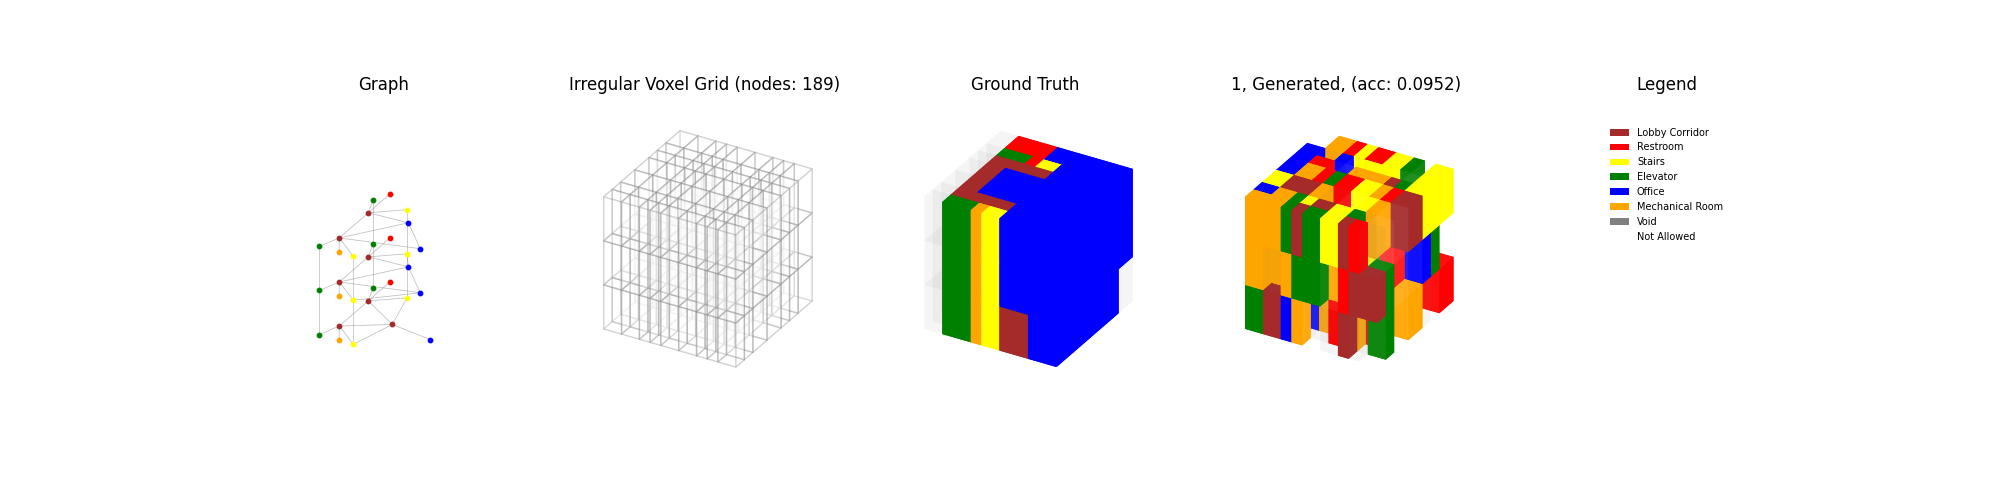

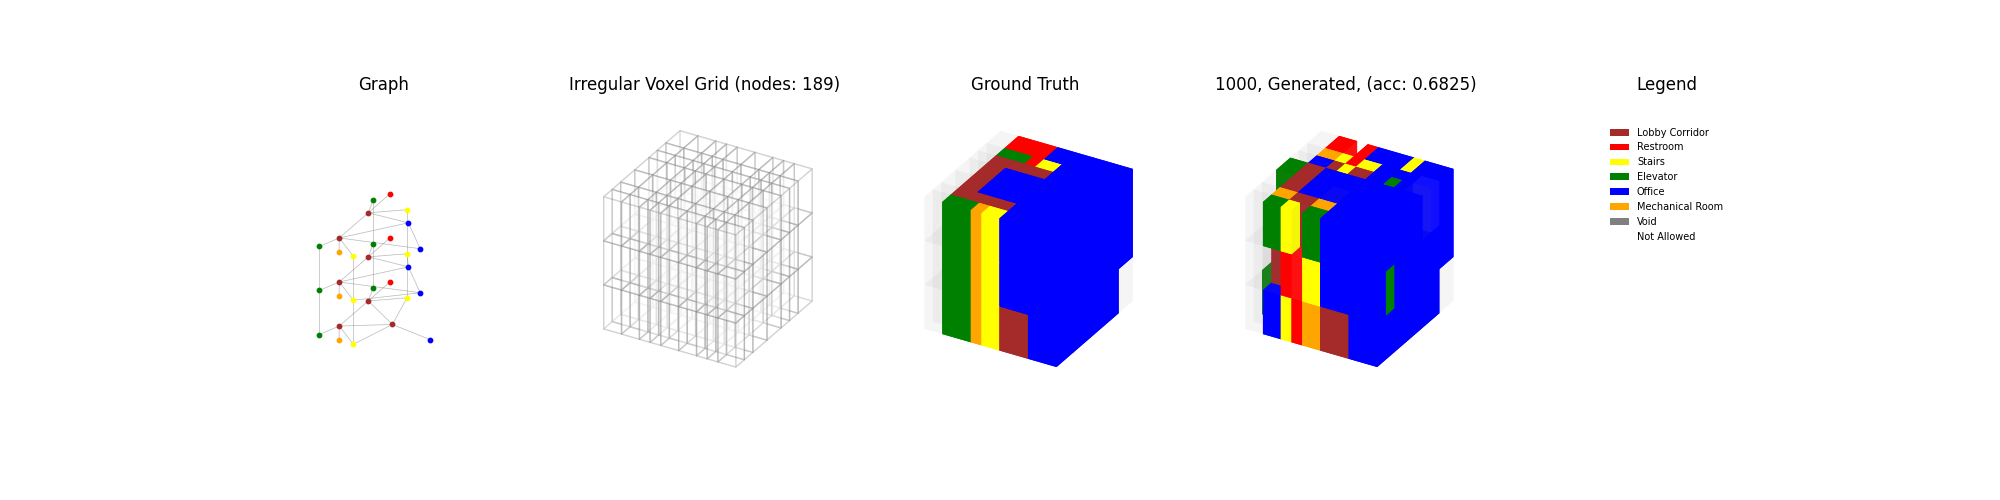

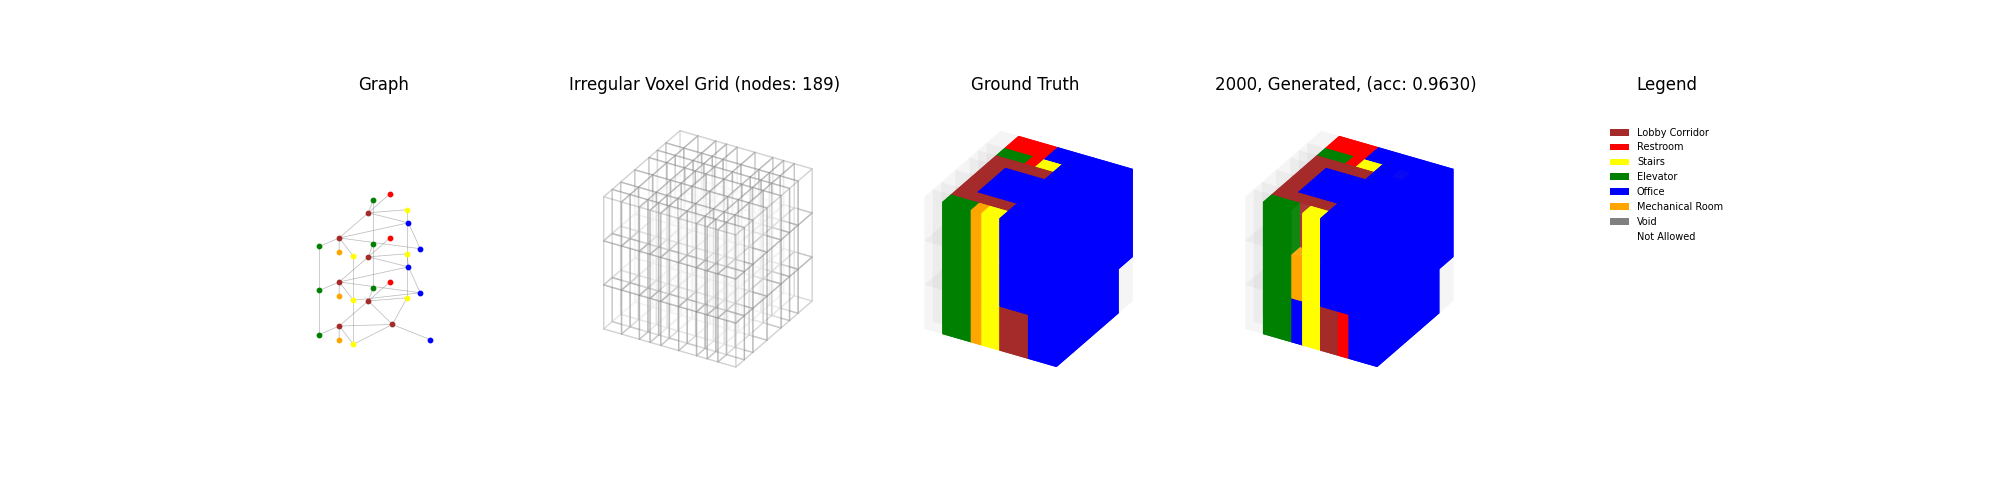

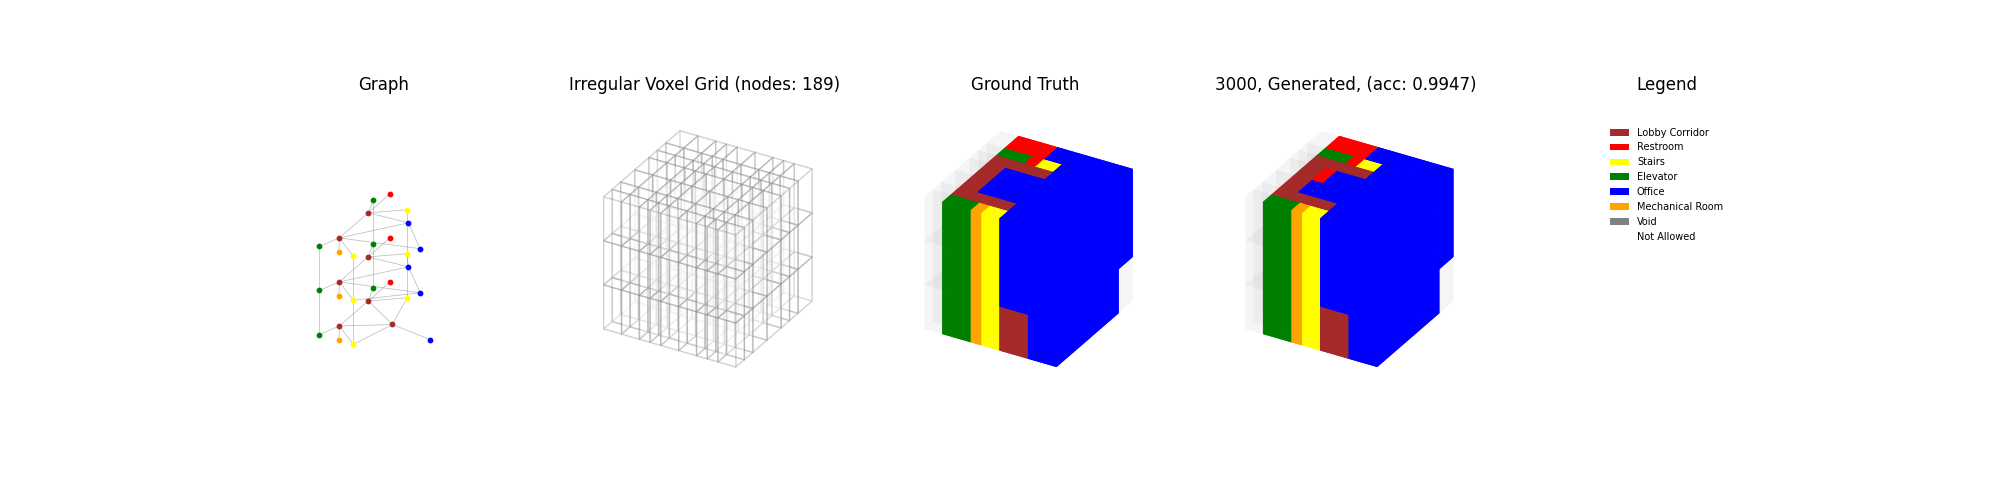

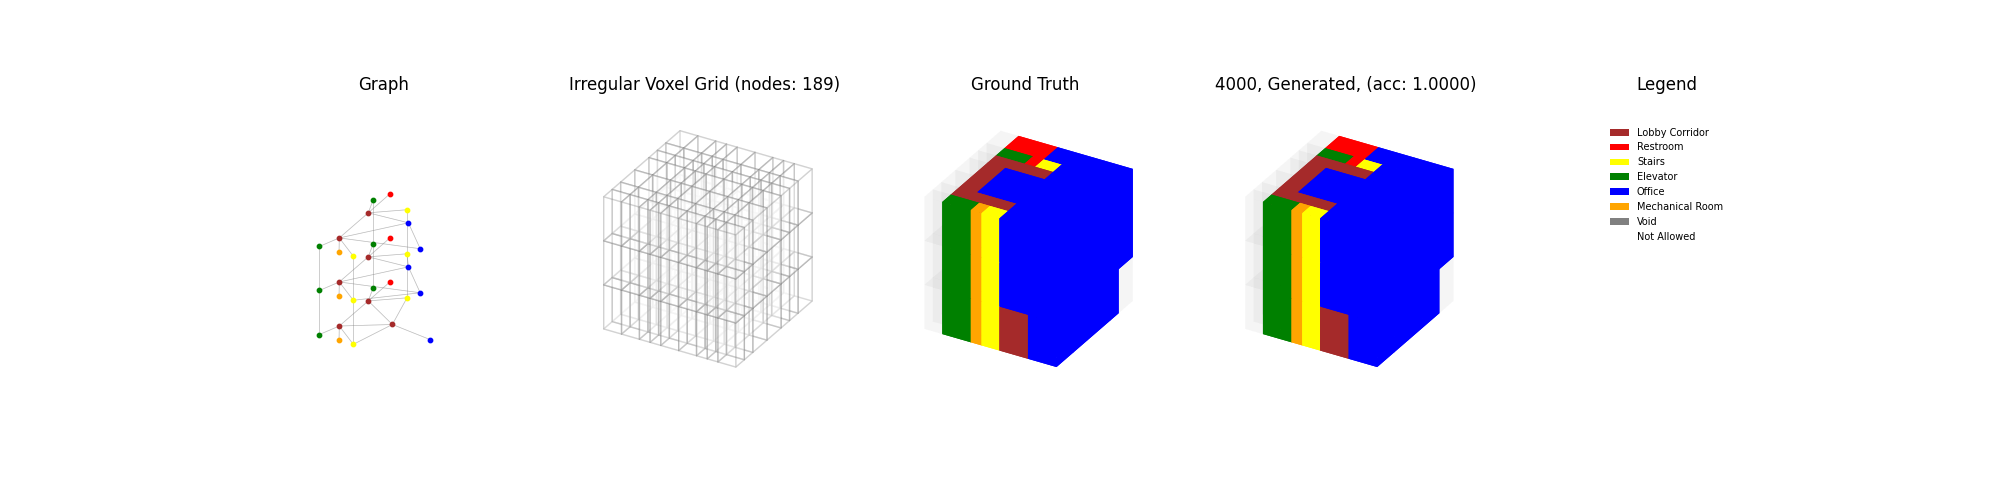

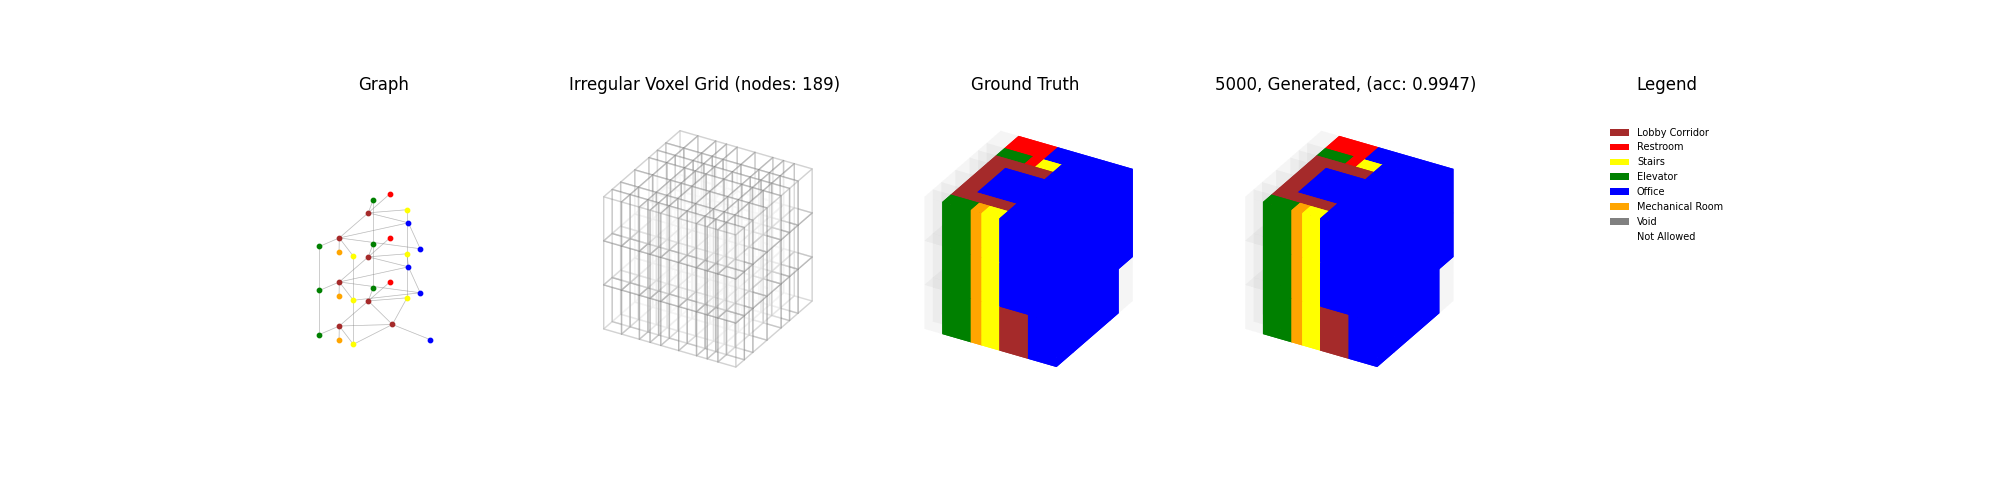

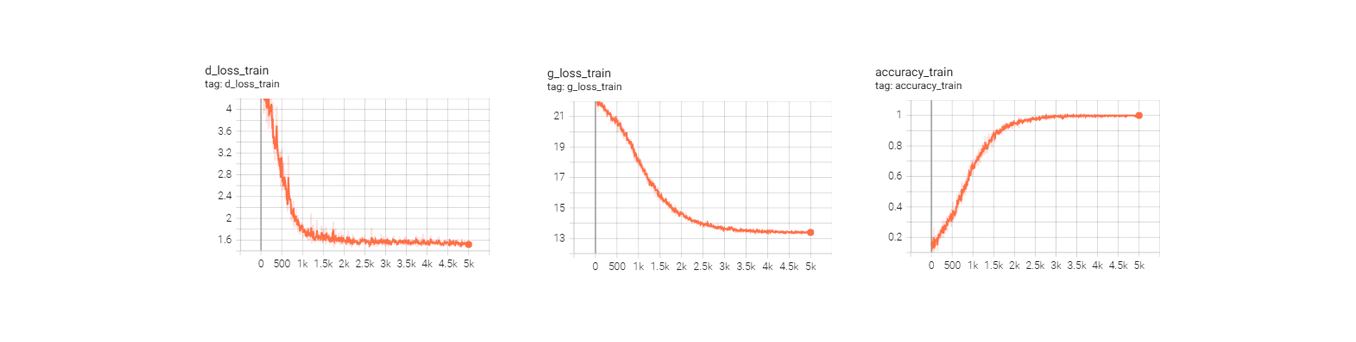

In [1]:
from IPython.display import Image, display

display(Image('../assets/sanity-checking-0001.png'))
display(Image('../assets/sanity-checking-1000.png'))
display(Image('../assets/sanity-checking-2000.png'))
display(Image('../assets/sanity-checking-3000.png'))
display(Image('../assets/sanity-checking-4000.png'))
display(Image('../assets/sanity-checking-5000.png'))
display(Image('../assets/sanity-checking-scalars.png'))